In [1]:
import sys 
sys.path.append("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import torch
import torch.nn as nn
import cebra_v2 as cebra2
from collections import defaultdict
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,FastICA,KernelPCA
from torch.utils.data.sampler import BatchSampler
import package
import pandas as pd
import matplotlib.animation as animation
import tembedding
import scipy as sc
from skimage.metrics import structural_similarity as ssim
from sklearn.cluster import KMeans,OPTICS
import math
import time
from multiprocessing import Lock, Process, Queue
import multiprocessing
import queue 
import os
import networkx as nx
from scipy.spatial.transform import Rotation as R
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## Fonctions utiles

In [6]:
def display(states,li_titles):
    fig = plt.figure(figsize=(11, 11))
    
    # setting values to rows and column variables
    n = len(states)
    rows = int(np.sqrt(n))+1
    columns = n // (rows-1)
    
    for i in range(n):
        fig.add_subplot(rows, columns, i+1)
        # showing image
        plt.imshow(states[i])
        plt.axis('off')
        plt.title(li_titles[i])

In [1]:
dfc = np.load('/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/inputs.npy')
meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/metadata.tsv", sep="\t")

NameError: name 'np' is not defined

In [4]:
dict_labels = {"awake" : 0, "light-propofol" : 1, "deep-propofol" : 2}
dfc_all = dfc[(meta["condition"].isin(['awake', 'light-propofol', 'deep-propofol']))].reshape((-1, 464, 82, 82))
dfc_all_vector = torch.from_numpy(dfc_all.reshape((dfc_all.shape[0],464,1,82,82)))
dfc_all_vector = torch.squeeze(dfc_all_vector,dim=2)
dfc_all_vector = package.preprocessing.flatten_higher_triangular(dfc_all_vector)
labels_condition_all = meta["condition"][(meta["condition"].isin(['awake', 'light-propofol', 'deep-propofol']))]
labels_all = np.array([dict_labels[elem] for elem in labels_condition_all]).reshape((len(labels_condition_all)//464,464))

In [5]:
graph = np.load("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DistanceMatrices/light-propofol_deep-propofol_awake/distances.npy")

## Kernel PCA

In [10]:
X = dfc_all_vector.reshape((-1,3321))
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
y = labels_all.reshape(-1)

In [31]:
graph_flatten = graph.reshape(86*464,86*464)

In [32]:
idx = np.array([3*i for i in range(86*464//3)])
X = 1 - np.array([[graph_flatten[i,j] for i in idx] for j in idx])
accu = labels_all.reshape(-1)
y = np.array([accu[i] for i in idx])

In [40]:
transformer = KernelPCA(n_components=10, kernel='precomputed')
X_transformed = transformer.fit_transform(X)

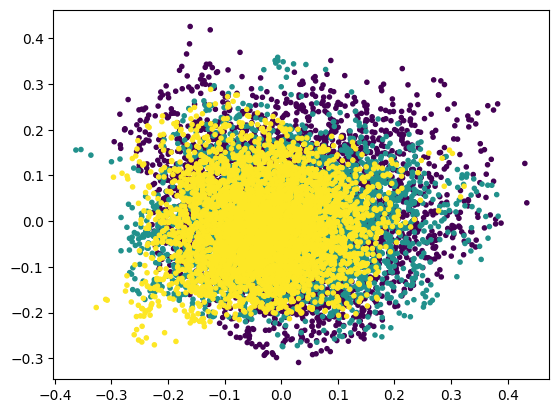

In [53]:
colors = np.array(["black","blue","red"])
plt.scatter(X_transformed[:,6].flatten(),X_transformed[:,7].flatten(),marker = '.',c = y)